<a href="https://colab.research.google.com/github/kvnchandra/ml-assignment-bangkit/blob/master/main%20(Predict%20Breast%20Cancer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Breast Cancer Diagnostic**


---


*Bangkit Academy 2020 : DPS-1 #05-W05-First Machine Learning Project - MLCC*

Team members :
1.   Kevin Chandra
2.   Oktavia Citra
3.   Gani Nur Fadli

We use data from [kaggle.com ](https://https://www.kaggle.com/) with the title "Breast Cancer Wisconsin (Diagnostic) Data Set". We want to predict whether the cancer is benign or malignant of breast cancer patients. We can build this program because we've learned a lot from [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course) and [TensorFlow Website](https://www.tensorflow.org/tutorials/)

***Here the step by step and code bellow!***


# **Setup**

identification tensorflow newest version, so there is no error with the caption "tensorflow is already loaded. please restart the runtime to change versions."

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Import all modules and library that you need in the top

In [0]:
# Import relevant modules
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# **Initial Data**

If you have data.csv and you want to publish on web, you can use feature Google Spreadsheet. You just need to copy the link that had been generated

In [0]:
# Download data using URL then save as "data.csv"
URL = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQwPxotnLsgXuZt6tIXlAANttT3pxhP4ph0FhSjwvGUXfGKcnFRiqJORQg_9lBC77AH7QaxYypQ24nX/pub?output=csv"
dataset_path = keras.utils.get_file("data.csv", URL)
dataset_path

'/root/.keras/datasets/data.csv'

This is using funcation read data csv from pandas. It's so simple

In [0]:
# Read data that had been dowloaded
dataframe = pd.read_csv(dataset_path)
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,7.871,1.095,9.053,8.589,153.40,6.399,4.904,5.373,1.587,3.003,6.193,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,842517,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,5.667,5.435,7.339,3.398,74.08,5.225,1.308,186.000,134.000,1.389,3.532,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,84300903,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,5.999,7.456,7.869,4.585,94.03,615.000,4.006,3.832,2.058,225.000,4.571,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,84348301,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,9.744,4.956,1.156,3.445,27.23,911.000,7.458,5.661,1.867,5.963,9.208,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,84358402,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,5.883,7.572,7.813,5.438,94.44,1.149,2.461,5.688,1.885,1.756,5.115,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


Get all the columns in dataset

In [0]:
dataframe.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

There are some columns that have space in their name. So we rename that columns' name so there is no space in the name

In [0]:
dataframe.rename(columns={'concave points_mean': 'concave_points_mean',
                          'concave points_se' : 'concave_points_se',
                          'concave points_worst' : 'concave_points_worst'},
                 inplace=True)

Based on the table above, **id** won't be used as feature for classification problem. So we remove the **id**

In [0]:
dataframe.drop('id', axis=1, inplace=True)  # dropping the 'id' column

print("Row, Col", dataframe.shape)          # (row,col)

Row, Col (569, 31)


For diagnosis, we change the label as 1 and 0 :
- Benign : 0
- Malignant : 1

In [0]:
dataframe['diagnosis'] = dataframe['diagnosis'].map({'M':1, 'B':0})

dataframe.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,7.871,1.095,9.053,8.589,153.40,6.399,4.904,5.373,1.587,3.003,6.193,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,1,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,5.667,5.435,7.339,3.398,74.08,5.225,1.308,186.000,134.000,1.389,3.532,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,1,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,5.999,7.456,7.869,4.585,94.03,615.000,4.006,3.832,2.058,225.000,4.571,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,1,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,9.744,4.956,1.156,3.445,27.23,911.000,7.458,5.661,1.867,5.963,9.208,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,1,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,5.883,7.572,7.813,5.438,94.44,1.149,2.461,5.688,1.885,1.756,5.115,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


In classification, you must have 3 types of data. Those are train data, validation data, and test data.

In [0]:
# First, separate data into 2 types
train, test = train_test_split(dataframe, 
                               test_size=0.2,
                               stratify=dataframe['diagnosis'])     # split data into same ratio based on diagnosis

print('Length of\n\tTrain Data\t: ', len(train),
      '\n\tTest Data\t: ', len(test))

Length of
	Train Data	:  455 
	Test Data	:  114


# **Inspect Data**
To find out each data type of the columns in the dataset.

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 72 to 24
Data columns (total 31 columns):
diagnosis                  455 non-null int64
radius_mean                455 non-null float64
texture_mean               455 non-null float64
perimeter_mean             455 non-null float64
area_mean                  455 non-null float64
smoothness_mean            455 non-null float64
compactness_mean           455 non-null float64
concavity_mean             455 non-null float64
concave_points_mean        455 non-null float64
symmetry_mean              455 non-null float64
fractal_dimension_mean     455 non-null float64
radius_se                  455 non-null float64
texture_se                 455 non-null float64
perimeter_se               455 non-null float64
area_se                    455 non-null float64
smoothness_se              455 non-null float64
compactness_se             455 non-null float64
concavity_se               455 non-null float64
concave_points_se          455 no

To summarize all the columns in the dataset.

In [0]:
train.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.373626,14.058919,19.131780,91.523297,647.583297,56.996692,26.396363,43.100934,35.607226,18.152782,63.800141,34.525196,25.976598,8.658993,39.411259,50.805466,27.086095,28.741637,43.962960,18.881141,31.691987,16.173393,25.428703,106.670352,868.921319,14.514895,32.252662,42.476859,43.003211,34.333393,62.184785
std,0.484299,3.473071,4.271049,23.902923,340.679544,200.722282,107.025659,147.323548,126.185850,52.630853,182.614818,104.844738,127.849765,70.305071,42.103986,165.583906,100.206816,113.216687,156.479186,57.709517,108.582042,4.750113,6.147558,32.962423,548.617641,59.281347,111.783008,140.136113,155.124477,92.986392,201.080589
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.100000,0.110000,0.000000,0.000000,0.220000,0.060000,0.210000,0.780000,1.011000,6.802000,0.010000,1.003000,0.000000,0.000000,1.013000,1.008000,7.930000,12.020000,50.410000,185.200000,0.130000,0.100000,0.000000,0.000000,0.230000,0.120000
25%,0.000000,11.680000,15.905000,75.190000,418.500000,1.134500,1.358500,1.694500,1.957500,1.638000,5.857000,2.206000,1.286500,1.667000,17.695000,4.464500,1.698000,1.865000,1.341500,1.532000,2.222500,12.995000,20.730000,84.095000,515.550000,1.227000,1.889500,1.910000,1.562000,2.538500,6.540500
50%,0.000000,13.240000,18.750000,85.980000,541.600000,8.306000,4.102000,3.174000,3.472000,1.807000,6.235000,3.163000,1.909000,2.312000,23.920000,5.919000,2.772000,3.113000,2.215000,1.962000,3.362000,14.920000,25.210000,97.580000,684.500000,1.386000,2.942000,3.439000,2.564000,2.868000,7.661000
75%,1.000000,15.765000,21.680000,103.950000,781.800000,9.424000,7.558000,6.431500,7.495000,2.025500,6.900500,5.370500,7.205500,3.513000,45.295000,7.802500,4.929000,5.197000,7.647500,2.697500,4.980000,18.500000,29.370000,124.950000,1039.500000,1.562500,5.211000,6.127000,7.431000,3.310500,8.665500
max,1.000000,28.110000,39.280000,188.500000,2499.000000,997.000000,812.000000,973.000000,974.000000,254.000000,898.000000,647.000000,948.000000,968.000000,525.600000,925.000000,838.000000,996.000000,956.000000,388.000000,866.000000,33.130000,49.540000,229.300000,3432.000000,997.000000,872.000000,942.000000,991.000000,544.000000,997.000000


To find out the percentage of breast cancer patients

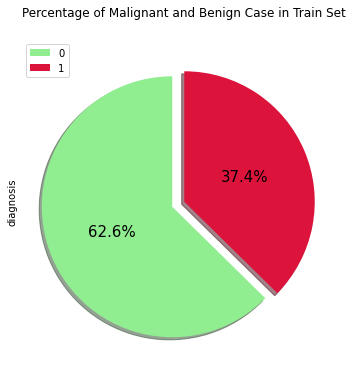

In [0]:
colors_list = ['lightgreen', 'crimson']
explode_list = [0.1, 0]     # ratio for each class with which to offset each wedge.

train['diagnosis'].value_counts().plot(kind='pie',
                                       figsize=(6, 6),
                                       autopct='%1.1f%%', 
                                       startangle=90,    
                                       shadow=True,       
                                       labels=None,         # turn off labels on pie chart
                                       pctdistance=0.5,     # the ratio between the center of each pie slice and the start of the text generated by autopct 
                                       fontsize=15,
                                       colors=colors_list,  # add custom colors
                                       explode=explode_list 
                                       )

# scale the title up by 5% to match pctdistance
plt.title('Percentage of Malignant and Benign Case in Train Set', y = 1.05) 
# add legend
plt.legend(labels=train['diagnosis'].value_counts().index, loc='upper left') 
plt.show()

Have a quick look at the joint distribution of a few pairs of columns from the dataset.

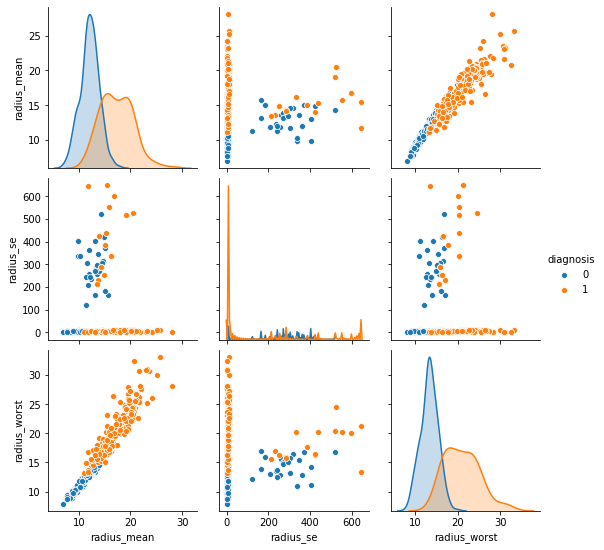

In [0]:
# Choose one criteria column from the data
sns.pairplot(train[["diagnosis", "radius_mean",	"radius_se", "radius_worst"]],
             hue = 'diagnosis', 
             diag_kind="kde")

In classification, you must have 3 types of data. Those are train data, validation data, and test data.

In [0]:
# First, separate data into 2 types
train, val = train_test_split(train, 
                              test_size=0.2, 
                              stratify=train['diagnosis'])

print('Length of\n\tTrain Data\t: ', len(train),
      '\n\tTest Data\t: ', len(val))

Length of
	Train Data	:  364 
	Test Data	:  91


# Create an input pipeline using tf.data
This will enable to use feature columns as a bridge to map from the columns in the Pandas dataframe to features used to train the model.

In [0]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('diagnosis')

    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))

    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
        
    return ds.batch(batch_size)

# Choose which columns to use
Pick the features are the most meaningful to include, and how they should be represented.

In [0]:
train_cols = list(train.columns)
train_cols.remove('diagnosis')
feature_columns = []

# numeric cols
for header in train_cols:
    feature_columns.append(tf.feature_column.numeric_column(header))

# Create a feature layer
define the feature columns, 

In [0]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [0]:
batch_size = 32

train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

# Understand the input pipeline
Check the data structure of train data set, so that we will know how the model will be worked

In [0]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of targets:', label_batch )

Every feature: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
A batch of targets: tf.Tensor([1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0], shape=(32,), dtype=int64)


# Create, compile, and train the model
This is classification's process

In [0]:
model = tf.keras.Sequential([
    feature_layer,
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=20)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

12/12 [==============================] - 0s 32ms/step - loss: 14.3980 - accuracy: 0.5907 - val_loss: 8.3288 - val_accuracy: 0.7473
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 3.5334 - accuracy: 0.7555 - val_loss: 5.3556 - val_accuracy: 0.6264
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 2.7201 - accuracy: 0.7967 - val_loss: 3.3375 - val_accuracy: 0.7473
Epoch 4/20
12/12 [==============================] - 0s 5ms/step - loss: 1.6307 - accur

It records training metrics for each epoch.

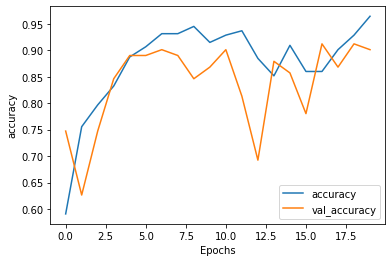

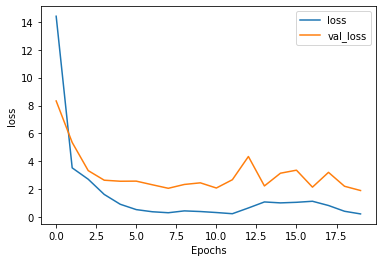

In [0]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
loss, acc = model.evaluate(test_ds)
print('Loss\t\t:', loss, 
      '\nAccuracy\t:', acc)

4/4 [==============================] - 0s 3ms/step - loss: 2.7246 - accuracy: 0.9123
Loss		: 2.7246413230895996 
Accuracy	: 0.9122806787490845


# Prediction
Use tf.keras.Model.predict to infer labels on a batch or a dataset of batches.

In [0]:
predictions = model.predict(test_ds)
# Show some results
for prediction, survived in zip(predictions[:10], list(test_ds)[0][1][:10]):
  print("Predicted survival\t: {:.2%}\t".format(prediction[0]),
        " | Actual outcome\t: ",
        ("Malignant" if bool(survived) else "Benign"))

Predicted survival	: -75.25%	  | Actual outcome	:  Benign
Predicted survival	: 215.39%	  | Actual outcome	:  Benign
Predicted survival	: -548.64%	  | Actual outcome	:  Benign
Predicted survival	: 978.45%	  | Actual outcome	:  Malignant
Predicted survival	: -253.35%	  | Actual outcome	:  Benign
Predicted survival	: 5817.72%	  | Actual outcome	:  Malignant
Predicted survival	: 3077.13%	  | Actual outcome	:  Malignant
Predicted survival	: -713.92%	  | Actual outcome	:  Benign
Predicted survival	: 572.73%	  | Actual outcome	:  Malignant
Predicted survival	: -1077.19%	  | Actual outcome	:  Benign
